In [3]:
import sysid
import ssid
import sippy
import parid
import numpy
import control
from matplotlib import pyplot as plt
import importlib

In [6]:
est = parid.Estimate()

A = [[0.90483742]]

B = [[0.09055917]]

C = [[1.]]

D = [[0.04837418]]



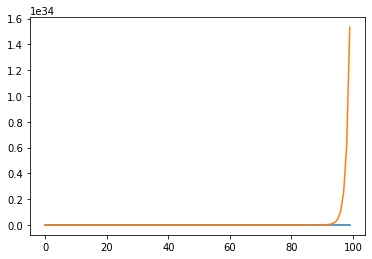

In [8]:
# test sysid

ts = range(100)
us = [est.input['Rect'](t, 10, 50, 100) for t in ts]
_, ys, _ = control.forced_response(control.tf([1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def sysid_id(y, u):
    ss1_id = sysid.subspace_det_algo1(y, u, f=2, p=2, s_tol=1e-2, dt=1)
    tf = control.ss(ss1_id.A, ss1_id.B, ss1_id.C, ss1_id.D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    print(tf)
    return ts, ys

id = sysid_id(ys, us)
plt.plot(id[0], id[1])

# this module gives questionable results

ValueError: all the input array dimensions except for the concatenation axis must match exactly

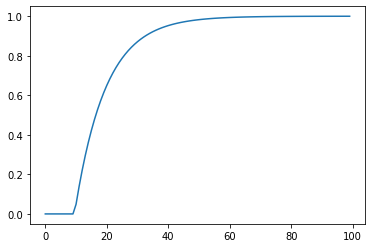

In [9]:
# try a different module
importlib.reload(ssid)

_, ys, _ = control.forced_response(control.tf([1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def subspace_id(y, u):
    u, y = numpy.array([u]), numpy.array([y])
    A, B, C, D, Cov, S = ssid.N4SID(u, y, 100, 100, 4)
    tf = control.ss(A, B, C, D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    plt.plot(ts, ys) 
    return tf.num, tf.den

subspace_id(ys, us)

# "TypeError: 'float' object cannot be interpreted as an integer" but I cannot see where to correct it
# the above error exists even in the example code from the N4SID github when run https://github.com/AndyLamperski/pyN4SID/blob/master/N4SIDtest.ipynb

A = [[0.9047682]]

B = [[-0.06018472]]

C = [[-1.68736011]]

D = [[0.]]



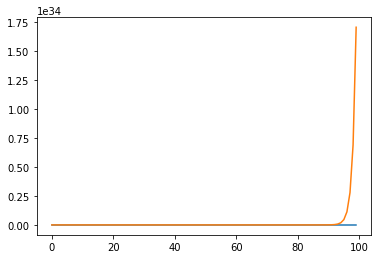

In [10]:
# try SIPPY https://github.com/CPCLAB-UNIPI/SIPPY.git (requires slycot)

_, ys, _ = control.forced_response(control.tf([1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def sippy_id(y, u):
    u, y = numpy.array(u), numpy.array(y)
    sys_id = sippy.system_identification(y, u, 'N4SID', SS_fixed_order=1)
    tf = control.ss(sys_id.A, sys_id.B, sys_id.C, sys_id.D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    print(tf)
    return ts, ys

id = sippy_id(ys, us)
plt.plot(id[0], id[1])

# similar problem as sysid?

A = [[0.9047682]]

B = [[-0.06018472]]

C = [[-1.68736011]]

D = [[0.]]

A = [[0.90483742]]

B = [[0.09055917]]

C = [[1.]]

D = [[0.04837418]]



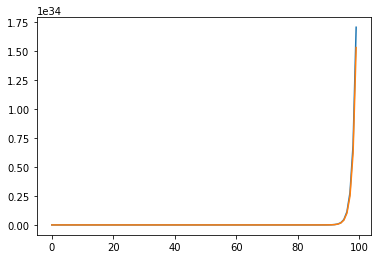

In [11]:
sipid = sippy_id(ys, us)
syid = sysid_id(ys, us)
t = sipid[0]

plt.plot(t, sipid[1])
plt.plot(t, syid[1])